In [98]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [121]:
# Load the Excel file
excel_path = "/Users/nicki/PortoProjek/lloyds-customer-churn-prediction/data/Raw/Customer_Churn_Data_Large.xlsx"

# Read all sheets (as dictionary)
all_sheets = pd.read_excel(excel_path, sheet_name=None, index_col=0)

# Concatenate all sheets side-by-side (axis=1)
merged_df = pd.concat(
    [df.reset_index(drop=True) for df in all_sheets.values()],
    axis=1
)

# Save to CSV
output_path = "/Users/nicki/PortoProjek/lloyds-customer-churn-prediction/data/Raw/Customer_Churn_Merged.csv"
merged_df.to_csv(output_path, index=False, encoding="utf-8")

# Load merged CSV to verify
data = pd.read_csv(output_path)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   float64
 1   Gender            1000 non-null   object 
 2   MaritalStatus     1000 non-null   object 
 3   IncomeLevel       1000 non-null   object 
 4   TransactionID     5054 non-null   int64  
 5   TransactionDate   5054 non-null   object 
 6   AmountSpent       5054 non-null   float64
 7   ProductCategory   5054 non-null   object 
 8   InteractionID     1002 non-null   float64
 9   InteractionDate   1002 non-null   object 
 10  InteractionType   1002 non-null   object 
 11  ResolutionStatus  1002 non-null   object 
 12  LastLoginDate     1000 non-null   object 
 13  LoginFrequency    1000 non-null   float64
 14  ServiceUsage      1000 non-null   object 
 15  ChurnStatus       1000 non-null   float64
dtypes: float64(5), int64(1), object(10)
memory

In [122]:
data= pd.read_csv("/Users/nicki/PortoProjek/lloyds-customer-churn-prediction/data/Raw/Customer_Churn_Merged.csv")

In [123]:
#select the most relevant features for predicting customer churn.
#Focus on key areas such as customer demographics, transaction history, and customer service interactions.

In [124]:
relevant_columns = ["Age","Gender","MaritalStatus","IncomeLevel","TransactionDate","AmountSpent","ProductCategory","InteractionDate","InteractionType","ResolutionStatus","LastLoginDate","LoginFrequency","ServiceUsage","ChurnStatus"]
# Filter the DataFrame to include only relevant columns
filtered_data = data[relevant_columns]

In [125]:
#Summary of Selected Features for Customer Churn Prediction

In [126]:
print("\n DUPLICATES ")
print(df.duplicated().sum())

print("\nDATA TYPES ")
display(df.dtypes)

# DESCRIPTIVE SUMMARY

display(df.describe(include="all").T)

# Identify numeric & categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)



 DUPLICATES 
0

DATA TYPES 


Age                            float64
TransactionID                    int64
AmountSpent                    float64
InteractionID                  float64
LoginFrequency                 float64
Gender_M                       float64
MaritalStatus_Married          float64
MaritalStatus_Single           float64
MaritalStatus_Widowed          float64
IncomeLevel_Low                float64
IncomeLevel_Medium             float64
ProductCategory_Clothing       float64
ProductCategory_Electronics    float64
ProductCategory_Furniture      float64
ProductCategory_Groceries      float64
InteractionType_Feedback       float64
InteractionType_Inquiry        float64
ResolutionStatus_Unresolved    float64
ServiceUsage_Online Banking    float64
ServiceUsage_Website           float64
ChurnStatus                      int64
TransactionDate_Days             int64
InteractionDate_Days             int64
LastLoginDate_Days               int64
dtype: object

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,2.486900e-17,1.000500,-1.658518,-0.870842,-0.017526,0.835790,1.689106
TransactionID,1000.0,5.511770e+03,2576.402400,1004.000000,3346.750000,5498.500000,7643.250000,9993.000000
AmountSpent,1000.0,1.065814e-17,1.000500,-1.711016,-0.877594,-0.021649,0.874504,1.690357
InteractionID,1000.0,5.947184e+03,2304.552109,2015.000000,3989.750000,5904.500000,7899.250000,9997.000000
LoginFrequency,1000.0,1.865175e-17,1.000500,-1.773232,-0.865689,0.077444,0.860422,1.643400
Gender_M,1000.0,4.870000e-01,0.500081,0.000000,0.000000,0.000000,1.000000,1.000000
MaritalStatus_Married,1000.0,2.610000e-01,0.439400,0.000000,0.000000,0.000000,1.000000,1.000000
MaritalStatus_Single,1000.0,2.150000e-01,0.411028,0.000000,0.000000,0.000000,0.000000,1.000000
MaritalStatus_Widowed,1000.0,2.760000e-01,0.447240,0.000000,0.000000,0.000000,1.000000,1.000000
IncomeLevel_Low,1000.0,3.250000e-01,0.468609,0.000000,0.000000,0.000000,1.000000,1.000000


Numeric cols: ['Age', 'TransactionID', 'AmountSpent', 'InteractionID', 'LoginFrequency', 'Gender_M', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widowed', 'IncomeLevel_Low', 'IncomeLevel_Medium', 'ProductCategory_Clothing', 'ProductCategory_Electronics', 'ProductCategory_Furniture', 'ProductCategory_Groceries', 'InteractionType_Feedback', 'InteractionType_Inquiry', 'ResolutionStatus_Unresolved', 'ServiceUsage_Online Banking', 'ServiceUsage_Website', 'ChurnStatus', 'TransactionDate_Days', 'InteractionDate_Days', 'LastLoginDate_Days']
Categorical cols: []


In [127]:
filtered_data.isnull().sum()

Age                 4054
Gender              4054
MaritalStatus       4054
IncomeLevel         4054
TransactionDate        0
AmountSpent            0
ProductCategory        0
InteractionDate     4052
InteractionType     4052
ResolutionStatus    4052
LastLoginDate       4054
LoginFrequency      4054
ServiceUsage        4054
ChurnStatus         4054
dtype: int64

In [128]:
#Key Features Influencing Customer Churn

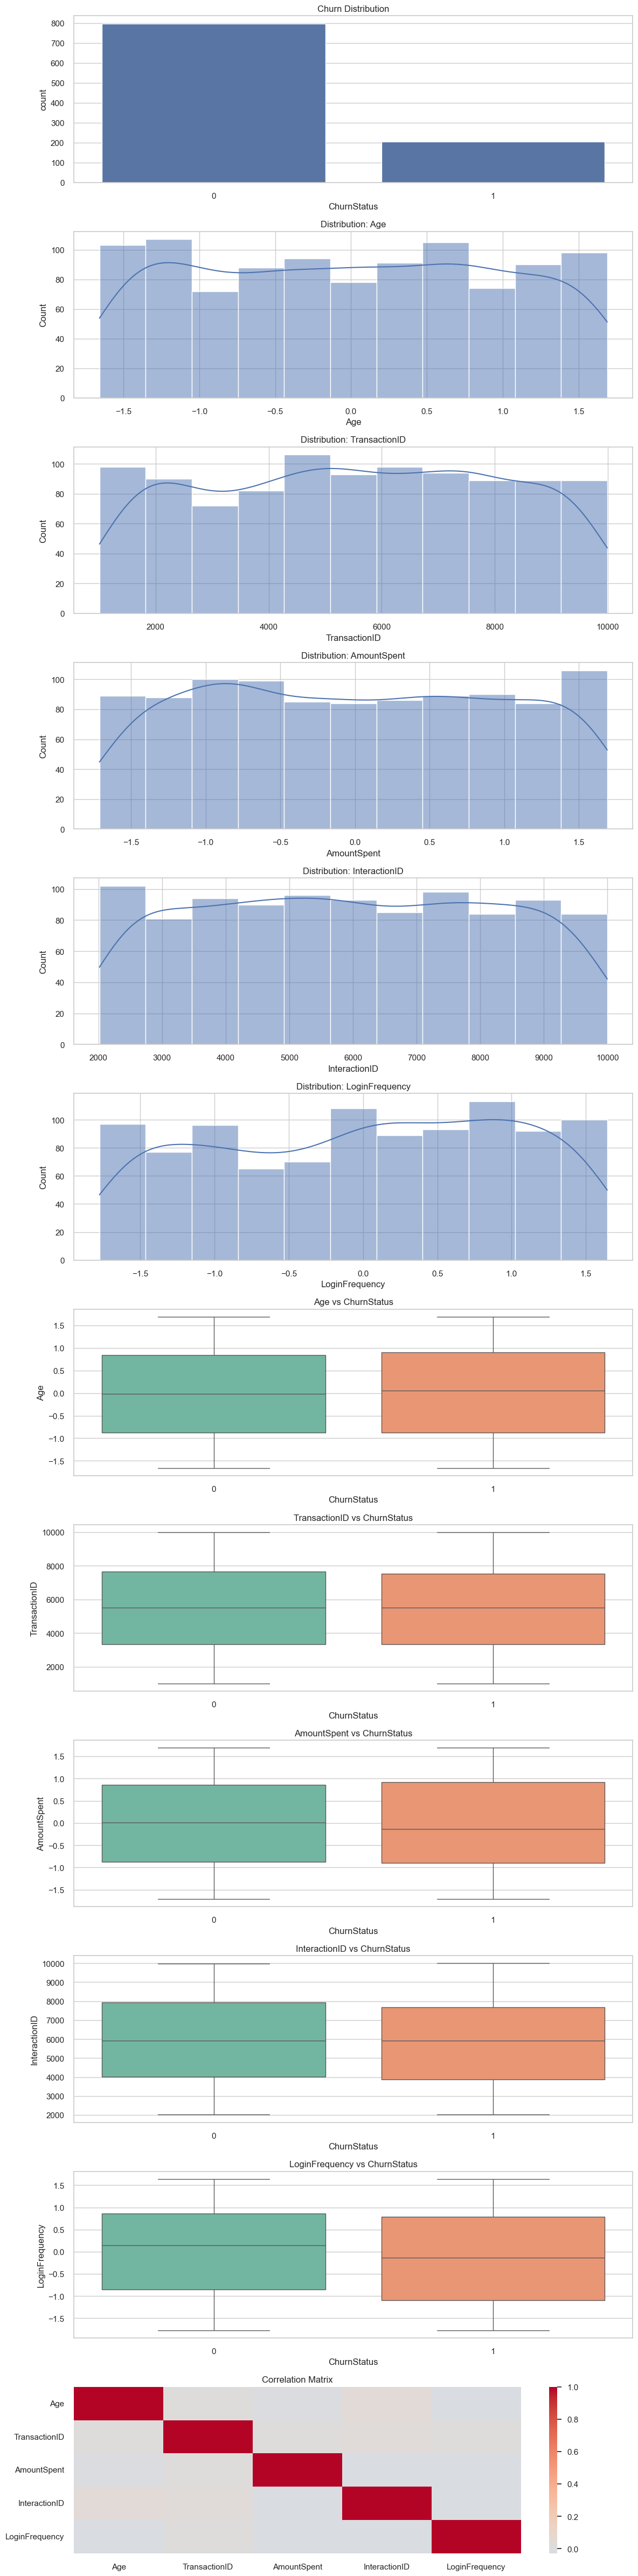

Saved: /Users/nicki/PortoProjek/lloyds-customer-churn-prediction/report/figures/eda_plot.png


In [138]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# MINIMAL DATETIME CASTING
date_cols = ["TransactionDate", "InteractionDate", "LastLoginDate"]

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")


# === FILTER NUMERIC COLS TANPA DUMMY ===
numeric_cols = [
    c for c in df.select_dtypes(include=np.number).columns
    if c != "ChurnStatus" and "_" not in c      # ⬅ filter kolom dummy
]


# === HITUNG TOTAL SUBPLOT YANG DIBUTUHKAN ===
n_cat = sum(df[col].nunique() <= 8 for col in cat_cols)
n_num = len(numeric_cols)
n_box = len(numeric_cols)
n_corr = 1 if len(numeric_cols) > 1 else 0
n_time = 1 if "TransactionDate" in df.columns else 0
n_time_churn = 1 if ("ChurnStatus" in df.columns and "TransactionDate" in df.columns) else 0
n_target = 1 if "ChurnStatus" in df.columns else 0

total_plots = (
    n_target + n_cat + n_num + n_box +
    n_corr + n_time + n_time_churn
)

# === BUAT 1 FIGURE DENGAN BANYAK AXES ===
fig, axes = plt.subplots(total_plots, 1, figsize=(12, 4 * total_plots))
axes = axes.flatten()
ax_i = 0


# === TARGET VARIABLE DISTRIBUTION ===
if "ChurnStatus" in df.columns:
    sns.countplot(data=df, x="ChurnStatus", ax=axes[ax_i])
    axes[ax_i].set_title("Churn Distribution")
    ax_i += 1


# === CATEGORICAL DISTRIBUTION ===
for col in cat_cols:
    if df[col].nunique() <= 8:
        sns.barplot(
            x=df[col].value_counts().index,
            y=df[col].value_counts().values,
            ax=axes[ax_i]
        )
        axes[ax_i].set_title(f"Distribution of {col}")
        axes[ax_i].tick_params(axis="x", rotation=45)
        ax_i += 1


# === NUMERIC HISTOGRAMS ===
for col in numeric_cols:
    sns.histplot(df[col], kde=True, ax=axes[ax_i])
    axes[ax_i].set_title(f"Distribution: {col}")
    ax_i += 1


# === BOX PLOTS NUMERIC vs TARGET ===
if "ChurnStatus" in df.columns:
    for col in numeric_cols:
        sns.boxplot(
            data=df,
            x="ChurnStatus",
            y=col,
            hue="ChurnStatus",
            dodge=False,
            legend=False,
            palette="Set2",
            ax=axes[ax_i]
        )
        axes[ax_i].set_title(f"{col} vs ChurnStatus")
        ax_i += 1


# === CORRELATION MATRIX ===
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, ax=axes[ax_i])
    axes[ax_i].set_title("Correlation Matrix")
    ax_i += 1


# === TRANSACTION DATE TREND ===
if "TransactionDate" in df.columns:
    df["_tx_month"] = df["TransactionDate"].dt.to_period("M")
    df["_tx_month"].value_counts().sort_index().plot(
        kind="line",
        ax=axes[ax_i]
    )
    axes[ax_i].set_title("Transactions Over Time")
    axes[ax_i].set_xlabel("Month")
    axes[ax_i].set_ylabel("Count")
    ax_i += 1


# === MONTHLY CHURN RATE ===
if "ChurnStatus" in df.columns and "TransactionDate" in df.columns:
    df.groupby(df["TransactionDate"].dt.to_period("M"))["ChurnStatus"].mean().plot(
        ax=axes[ax_i]
    )
    axes[ax_i].set_title("Monthly Churn Rate")
    axes[ax_i].set_xlabel("Month")
    axes[ax_i].set_ylabel("Churn Rate")
    ax_i += 1


plt.tight_layout()
plt.show()


save_path = "/Users/nicki/PortoProjek/lloyds-customer-churn-prediction/report/figures/eda_plot.png"

fig.savefig(save_path, dpi=300, bbox_inches="tight")

print(f"Saved: {save_path}")


In [130]:
#Clean and Preprocess data

In [131]:
df_clean = filtered_data.copy()  

print("Initial shape:", df_clean.shape)


# HANDLE MISSING VALUES

# Drop rows where target is missing
df_clean = df_clean[df_clean["ChurnStatus"].notnull()]

numeric_cols = ["Age", "AmountSpent", "LoginFrequency"]
categorical_cols = [
    "Gender", "MaritalStatus", "IncomeLevel", "ProductCategory",
    "InteractionType", "ResolutionStatus", "ServiceUsage"
]

# Impute numeric values
num_imputer = SimpleImputer(strategy="median")
df_clean[numeric_cols] = num_imputer.fit_transform(df_clean[numeric_cols])

# Impute categorical values
cat_imputer = SimpleImputer(strategy="most_frequent")
df_clean[categorical_cols] = cat_imputer.fit_transform(df_clean[categorical_cols])

print("After imputation:", df_clean.shape)


#  OUTLIER TREATMENT (WINSORIZING)

for col in numeric_cols:
    lower, upper = df_clean[col].quantile([0.01, 0.99])
    df_clean[col] = np.clip(df_clean[col], lower, upper)



Initial shape: (5054, 14)
After imputation: (1000, 14)


In [132]:
# STANDARDIZE NUMERICAL FEATURES

scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

# ONE-HOT ENCODING 

# Auto-detect sklearn version parameters
try:
    encoder = OneHotEncoder(sparse_output=False, drop="first")
except TypeError:
    encoder = OneHotEncoder(sparse=False, drop="first")

encoded = encoder.fit_transform(df_clean[categorical_cols])
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df_clean.index
)


# MERGE ENCODED + NUMERIC + TARGET


df_clean_final = pd.concat(
    [df_clean.drop(columns=categorical_cols), encoded_df],
    axis=1
)

# Move target to last column
cols = [col for col in df_clean_final.columns if col != "ChurnStatus"] + ["ChurnStatus"]
df_clean_final = df_clean_final[cols]

df_clean_final.dropna(inplace=True)
df_clean_final.reset_index(drop=True, inplace=True)


df_clean_final.to_csv("/Users/nicki/PortoProjek/lloyds-customer-churn-prediction/data/processed/cleaned_customer_churn_data.csv", index=False)

print("Final cleaned shape:", df_clean_final.shape)

df_clean_final.head(10)

Final cleaned shape: (1000, 22)


,Age,TransactionDate,AmountSpent,InteractionDate,LastLoginDate,LoginFrequency,Gender_M,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,...,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Groceries,InteractionType_Feedback,InteractionType_Inquiry,ResolutionStatus_Unresolved,ServiceUsage_Online Banking,ServiceUsage_Website,ChurnStatus
0,1.229628,2022-03-27,1.154712,2022-03-31,2023-10-21,0.575702,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.426547,2022-08-08,-1.397890,2022-03-17,2023-12-05,-1.488513,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,-1.658518,2022-07-25,-0.391506,2022-08-24,2023-11-15,-1.630872,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.461599,2022-01-25,-1.070642,2022-11-18,2023-08-25,-1.702052,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.461599,2022-07-24,1.019647,2022-07-03,2023-10-27,1.073961,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,0.901430,2022-01-09,0.227758,2022-05-05,2023-09-17,-1.702052,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,-1.067761,2022-09-16,0.412245,2022-04-29,2023-01-07,0.433343,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,-0.411364,2022-11-19,-0.375762,2022-09-13,2023-04-22,-0.634355,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
8,-0.280085,2022-10-08,-0.083957,2022-08-15,2023-06-27,-0.136096,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.623466,2022-08-15,-1.425354,2022-10-28,2023-01-13,0.219803,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
